In [2]:
import numpy as np
import pandas as pd

import sklearn.neighbors as neighbors

from importlib import reload
import copy
import synthetic.render.generator as gen

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import multiprocessing as mp

import sys
import os
import math
import logging
import time
import galsim
import fitsio as fio

import ngmix

import synthetic.render.render as render
import synthetic.render.icl as icl
import synthetic.render.frame as frame

import images
import meds
import subprocess

In [3]:
catalogs = []
catalog_tag = '/e/ocean1/users/vargatn/DES/SIM_DATA/SKY_MODEL_EPSILON/res_clust_v2_z0l0/epsilon_clust_v8-z0l0_15000_{:03d}.fits'
for i in np.arange(1):
    fname = catalog_tag.format(i)
    data = fio.read(fname)
    catalog_cluster = data[data['LOC'] == 1]
    catalog_field = data[data['LOC'] == 0]
    catalog = np.hstack((catalog_cluster, catalog_field))
    catalog['G1'] = 0.3
    catalog['G2'] = -0.2
    catalogs.append(catalog)

In [5]:

i = 0
name = 'canvas_{:03d}'.format(i)
print(name)
fr = frame.Frame(catalog, name=name, noise_std=4)
fr.render()
fr.extract()

canvas_000
starting xshear calculations in 100 processes
sex canvas_000.fits -c config.sex -CATALOG_NAME canvas_000_cat.fits -CHECKIMAGE_NAME canvas_000_seg.fits


In [10]:
ww = galsim.Image(fr.canvas)

In [15]:
ww.write("canvas_weight.fits")

In [25]:
nobj = len(fr.scat)

In [26]:
nobj

9362

In [27]:
dec = fr.scat["DELTA_J2000"]
ra = fr.scat['ALPHA_J2000']

In [28]:
box_size = np.ones(nobj) * 32

In [29]:
obj_data = meds.util.get_meds_input_struct(nobj)
obj_data['id'] = fr.scat['NUMBER']
obj_data['box_size'] = np.ones(nobj) * 32
obj_data['ra'] = fr.scat['ALPHA_J2000']
obj_data['dec'] = fr.scat['DELTA_J2000']

In [30]:
obj_data

array([(   1, 32, 89.99926201, -0.16698182),
       (   2, 32, 89.99873052, -0.16589047),
       (   3, 32, 90.0019943 , -0.16716066), ...,
       (9360, 32, 89.93963133,  0.12814115),
       (9361, 32, 90.04088286,  0.12611934),
       (9362, 32, 89.99826029,  0.15525484)],
      dtype=[('id', '<i8'), ('box_size', '<i8'), ('ra', '<f8'), ('dec', '<f8')])

In [31]:
nimage = 1
path_len = len('./canvas_000.fits')

In [50]:
image_info= meds.util.get_image_info_struct(nimage, 21)

In [51]:
len('./canvas_weight.fits')

20

In [59]:

image_info['image_path'][0] = './canvas_000.fits'
image_info['weight_path'][0] = './canvas_weight.fits' 
image_info['seg_path'][0] = './canvas_000_seg.fits'
image_info['magzp'] = 30.

config = {'first_image_is_coadd': False,'cutout_types':['weight','seg'],'psf_type':'psfex'}

In [60]:
image_info

array([(b'./canvas_000.fits', 0, b'./canvas_weight.fits', 0, b'./canvas_000_seg.fits', 0, b'', 0, b'', 0, 0, 0, 30., 1., 0.)],
      dtype=[('image_path', 'S21'), ('image_ext', '<i2'), ('weight_path', 'S21'), ('weight_ext', '<i2'), ('seg_path', 'S21'), ('seg_ext', '<i2'), ('bmask_path', 'S21'), ('bmask_ext', '<i2'), ('bkg_path', 'S21'), ('bkg_ext', '<i2'), ('image_id', '<i8'), ('image_flags', '<i8'), ('magzp', '<f4'), ('scale', '<f4'), ('position_offset', '<f8')])

In [61]:
mm = meds.MEDSMaker(obj_data=obj_data, image_info=image_info, config=config)

writing cutouts for: ['image', 'weight', 'seg']


In [62]:
mm.write("testmeds.fits")

file    1 of    1: 'b'./canvas_000.fits''
    first cut:    9362 of   9362 objects
    second cut:   9362 of   9362 objects
9362/9362 had ncut > 0
setting start rows and pixel count
total pixels: 9586688
meds layout build time: 0.051993 seconds
opening output MEDS file: 'testmeds.fits'
writing object_data
writing image_info
writing metadata
    reserving image mosaic
    reserving weight mosaic
    reserving seg mosaic
writing image cutouts
    1/1 image b'./canvas_000.fits'
    no background for image
writing weight cutouts
    1/1 weight b'./canvas_weight.fits'
writing seg cutouts
    1/1 seg b'./canvas_000_seg.fits'
output is in: testmeds.fits


In [63]:
m = meds.MEDS('testmeds.fits')

In [70]:
im = m.get_cutout(3, 0, 'seg')

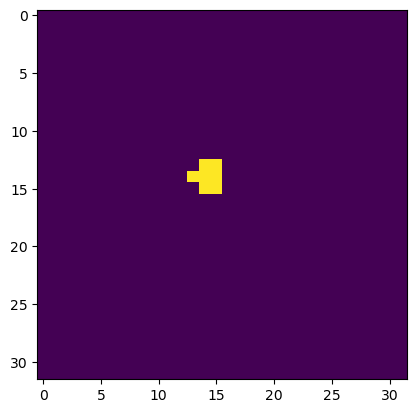

In [69]:
plt.imshow(im)

In [70]:
wcs_data = fio.read_header('./canvas_000.fits')

In [62]:
wcs_data


SIMPLE  =                    T / conforms to FITS standard
BITPIX  =                  -32 / array data type
NAXIS   =                    2 / number of array dimensions
NAXIS1  =                 5000
NAXIS2  =                 5000
EXTEND  =                    T
GS_XMIN =                    1 / GalSim image minimum x coordinate
GS_YMIN =                    1 / GalSim image minimum y coordinate
GS_WCS  = 'GSFitsWCS'          / GalSim WCS name
CTYPE1  = 'RA---TAN'
CTYPE2  = 'DEC--TAN'
CRPIX1  =               2500.5
CRPIX2  =               2500.5
CD1_1   = -7.3333333333333E-05
CD1_2   =                  0.0
CD2_1   =                  0.0
CD2_2   = 7.33333333333333E-05
CUNIT1  = 'deg     '
CUNIT2  = 'deg     '
CRVAL1  =                 90.0
CRVAL2  =                  0.0